In [140]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import MySignal as sig

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
from DataIOUtilities.DataLib import DataLib
dl = DataLib("SignalData")

In [142]:
signals = {}
signal_names = ['BondRetIdx/LocalFX', 'LongRates', 'ShortRates', 'EquityPrices', 'M1/inUSD', 
                'CurrAcctNom/inUSD', 'CurrAcctPctGDP', 'GDP/Nominal', 'GDP/Real', 'fxVsUSD', 
                'CoreCPI/SA', 'YieldCurve', 'CurveHeight']#, 'fxTrdWts/Nominal', 'fxTrdWts/Real']

countries = ['USA', 'GBR', 'CAN', 'AUS', 'CHE']

for country in countries:
    signals[country] = pd.DataFrame(data={signal_name: sig.standardize(dl.pull(signal_name)[country].resample('1D').ffill()\
                                 .pct_change().rolling(130, 130).apply(lambda x: (1+x).prod()-1, raw=True))
                                 for signal_name in signal_names})

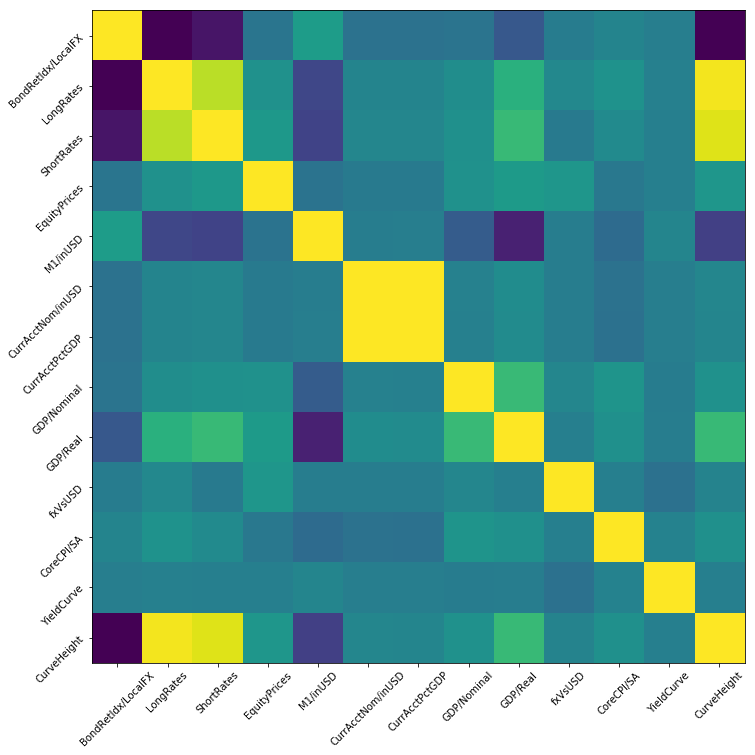

In [143]:
country = 'USA'
correlation_matrix=signals[country].corr()

fig = plt.figure(figsize=(12,12))
im = plt.imshow(correlation_matrix,interpolation='nearest')
plt.xticks(list(range(0,len(signal_names))), signal_names, rotation=45)
plt.yticks(list(range(0,len(signal_names))), signal_names, rotation=45)

plt.show()

In [144]:
correlation_matrix

,BondRetIdx/LocalFX,LongRates,ShortRates,EquityPrices,M1/inUSD,CurrAcctNom/inUSD,CurrAcctPctGDP,GDP/Nominal,GDP/Real,fxVsUSD,CoreCPI/SA,YieldCurve,CurveHeight
BondRetIdx/LocalFX,1.000000,-0.751488,-0.655270,-0.073079,0.214243,-0.091912,-0.091365,-0.074212,-0.271940,-0.013360,0.036706,-0.001540,-0.750537
LongRates,-0.751488,1.000000,0.816899,0.135012,-0.380775,0.038831,0.037195,0.104866,0.361064,0.063050,0.138349,0.007950,0.970702
ShortRates,-0.655270,0.816899,1.000000,0.180291,-0.401042,0.052667,0.050810,0.127209,0.426789,-0.034374,0.085291,0.004356,0.917047
EquityPrices,-0.073079,0.135012,0.180291,1.000000,-0.087733,-0.035673,-0.037099,0.133700,0.202373,0.165813,-0.052832,0.002683,0.170407
M1/inUSD,0.214243,-0.380775,-0.401042,-0.087733,1.000000,-0.005774,-0.003614,-0.241819,-0.587663,-0.007484,-0.139513,0.044319,-0.420053
CurrAcctNom/inUSD,-0.091912,0.038831,0.052667,-0.035673,-0.005774,1.000000,0.999903,0.017821,0.100928,-0.005799,-0.091681,-0.002040,0.049286
CurrAcctPctGDP,-0.091365,0.037195,0.050810,-0.037099,-0.003614,0.999903,1.000000,0.014221,0.094664,-0.007696,-0.096875,-0.002090,0.047379
GDP/Nominal,-0.074212,0.104866,0.127209,0.133700,-0.241819,0.017821,0.014221,1.000000,0.437527,0.054661,0.155658,-0.018925,0.133121
GDP/Real,-0.271940,0.361064,0.426789,0.202373,-0.587663,0.100928,0.094664,0.437527,1.000000,0.006294,0.127018,-0.011632,0.426630
fxVsUSD,-0.013360,0.063050,-0.034374,0.165813,-0.007484,-0.005799,-0.007696,0.054661,0.006294,1.000000,0.001214,-0.100431,0.031014


## Correlation with 6M-Future Bond Returns

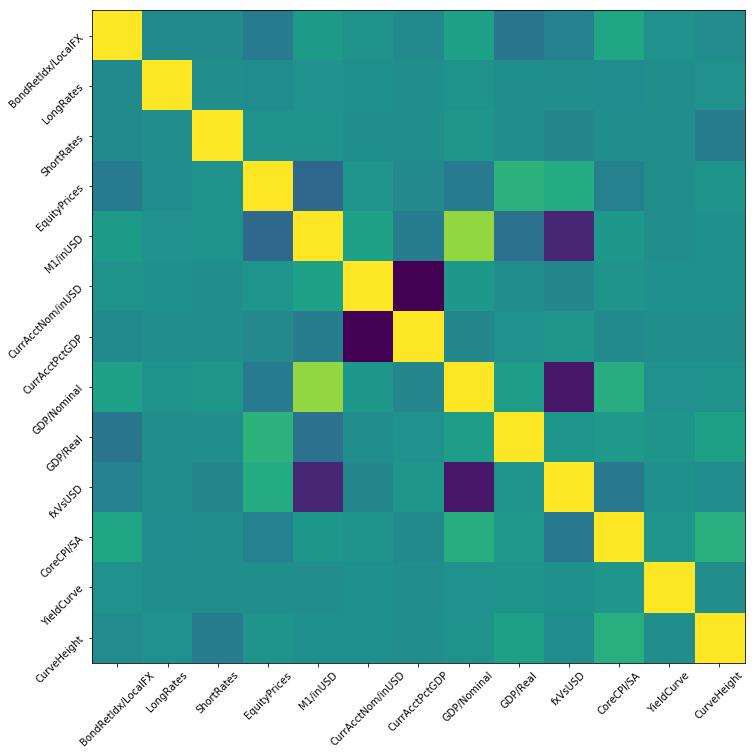

In [145]:
shifted_signals = {}
for country in countries:
    shifted_signals[country] = signals[country].copy()
    shifted_signals[country]['BondRetIdx/LocalFX'] = signals[country]['BondRetIdx/LocalFX'].shift(periods=-130)

shifted_correlation_matrix=shifted_signals[country].corr()

fig = plt.figure(figsize=(12,12))
im = plt.imshow(shifted_correlation_matrix,interpolation='nearest')
plt.xticks(list(range(0,len(signal_names))), signal_names, rotation=45)
plt.yticks(list(range(0,len(signal_names))), signal_names, rotation=45)

plt.show()

In [146]:
shifted_signals[country].corr()

,BondRetIdx/LocalFX,LongRates,ShortRates,EquityPrices,M1/inUSD,CurrAcctNom/inUSD,CurrAcctPctGDP,GDP/Nominal,GDP/Real,fxVsUSD,CoreCPI/SA,YieldCurve,CurveHeight
BondRetIdx/LocalFX,1.000000,-0.046889,-0.046872,-0.172446,0.095796,0.034334,-0.039876,0.146059,-0.215762,-0.110040,0.183844,0.014026,-0.029203
LongRates,-0.046889,1.000000,-0.010384,-0.023425,0.014698,0.006094,-0.008655,0.025133,0.003544,-0.012535,-0.025282,-0.000235,0.016576
ShortRates,-0.046872,-0.010384,1.000000,0.027123,0.019755,0.001790,-0.003683,0.065166,-0.004782,-0.076034,-0.017549,0.001991,-0.151057
EquityPrices,-0.172446,-0.023425,0.027123,1.000000,-0.325287,0.056372,-0.052980,-0.181516,0.298438,0.244653,-0.118664,-0.001231,0.038166
M1/inUSD,0.095796,0.014698,0.019755,-0.325287,1.000000,0.148453,-0.146824,0.677489,-0.240391,-0.781446,0.068758,-0.004187,0.009815
CurrAcctNom/inUSD,0.034334,0.006094,0.001790,0.056372,0.148453,1.000000,-0.992047,0.073036,-0.016632,-0.067342,0.036830,0.007689,0.009960
CurrAcctPctGDP,-0.039876,-0.008655,-0.003683,-0.052980,-0.146824,-0.992047,1.000000,-0.066159,0.018369,0.059179,-0.038593,-0.008707,-0.009441
GDP/Nominal,0.146059,0.025133,0.065166,-0.181516,0.677489,0.073036,-0.066159,1.000000,0.115019,-0.861457,0.252322,0.016106,0.034484
GDP/Real,-0.215762,0.003544,-0.004782,0.298438,-0.240391,-0.016632,0.018369,0.115019,1.000000,0.056423,0.075603,0.042683,0.137905
fxVsUSD,-0.110040,-0.012535,-0.076034,0.244653,-0.781446,-0.067342,0.059179,-0.861457,0.056423,1.000000,-0.183856,0.010556,-0.021843


# Diff to World

In [139]:
signals['world'] = sum(signals[country] for country in countries)/len(countries)

signals_diff = {}
for country in countries:
    signals_diff[country] = signals[country] - signals['world']

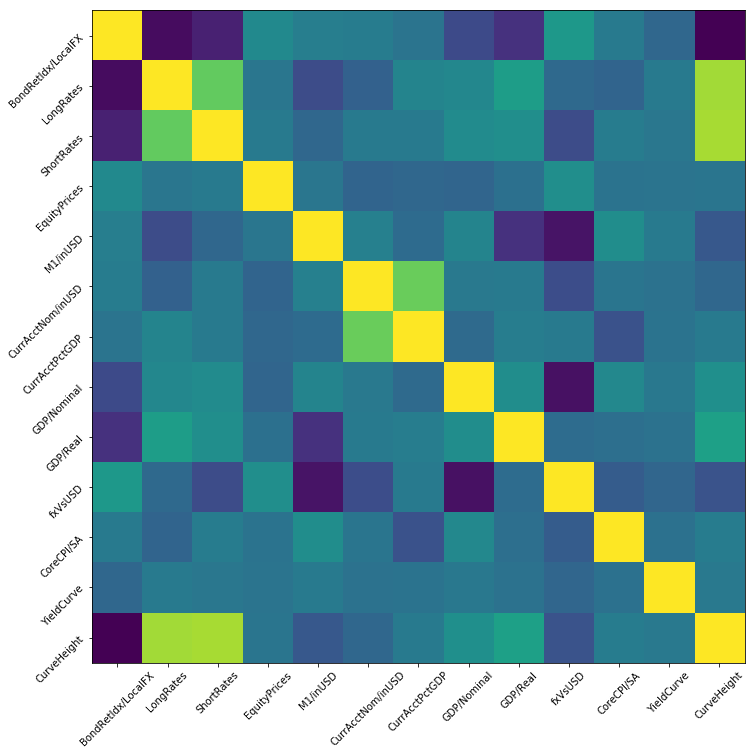

In [147]:
country = 'USA'
correlation_matrix=signals_diff[country].corr()

fig = plt.figure(figsize=(12,12))
im = plt.imshow(correlation_matrix,interpolation='nearest')
plt.xticks(list(range(0,len(signal_names))), signal_names, rotation=45)
plt.yticks(list(range(0,len(signal_names))), signal_names, rotation=45)

plt.show()

In [148]:
correlation_matrix

,BondRetIdx/LocalFX,LongRates,ShortRates,EquityPrices,M1/inUSD,CurrAcctNom/inUSD,CurrAcctPctGDP,GDP/Nominal,GDP/Real,fxVsUSD,CoreCPI/SA,YieldCurve,CurveHeight
BondRetIdx/LocalFX,1.000000,-0.555804,-0.463239,0.154584,0.077808,0.069067,0.012864,-0.248858,-0.377382,0.247344,0.049217,-0.073485,-0.608407
LongRates,-0.555804,1.000000,0.613389,0.022852,-0.233746,-0.111224,0.115944,0.135282,0.283917,-0.060168,-0.087184,0.051429,0.779228
ShortRates,-0.463239,0.613389,1.000000,0.056522,-0.073340,0.050283,0.045305,0.168233,0.183259,-0.231604,0.069494,0.029194,0.788493
EquityPrices,0.154584,0.022852,0.056522,1.000000,0.023637,-0.092582,-0.071892,-0.083168,-0.015535,0.187382,0.004809,0.011672,0.016432
M1/inUSD,0.077808,-0.233746,-0.073340,0.023637,1.000000,0.092448,-0.045414,0.115989,-0.380645,-0.526528,0.182581,0.055483,-0.162703
CurrAcctNom/inUSD,0.069067,-0.111224,0.050283,-0.092582,0.092448,1.000000,0.630702,0.040717,0.053803,-0.230869,0.019137,-0.000907,-0.072608
CurrAcctPctGDP,0.012864,0.115944,0.045305,-0.071892,-0.045414,0.630702,1.000000,-0.050738,0.076393,0.053607,-0.200505,0.001081,0.057568
GDP/Nominal,-0.248858,0.135282,0.168233,-0.083168,0.115989,0.040717,-0.050738,1.000000,0.179944,-0.535611,0.139435,0.034405,0.195739
GDP/Real,-0.377382,0.283917,0.183259,-0.015535,-0.380645,0.053803,0.076393,0.179944,1.000000,-0.037619,-0.018419,-0.000520,0.303501
fxVsUSD,0.247344,-0.060168,-0.231604,0.187382,-0.526528,-0.230869,0.053607,-0.535611,-0.037619,1.000000,-0.140599,-0.080115,-0.196204


## Correlation with 6M-Future Bond Returns Diff

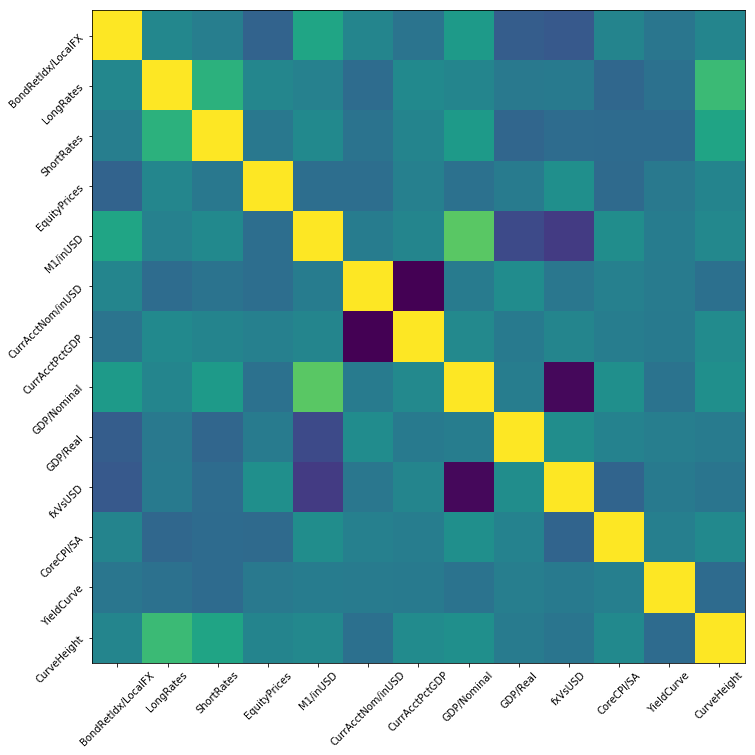

In [149]:
shifted_signals_diff = {}
for country in countries:
    shifted_signals_diff[country] = signals_diff[country].copy()
    shifted_signals_diff[country]['BondRetIdx/LocalFX'] = signals_diff[country]['BondRetIdx/LocalFX'].shift(periods=-130)

shifted_correlation_matrix = shifted_signals_diff[country].corr()

fig = plt.figure(figsize=(12,12))
im = plt.imshow(shifted_correlation_matrix,interpolation='nearest')
plt.xticks(list(range(0,len(signal_names))), signal_names, rotation=45)
plt.yticks(list(range(0,len(signal_names))), signal_names, rotation=45)

plt.show()

In [150]:
shifted_correlation_matrix

,BondRetIdx/LocalFX,LongRates,ShortRates,EquityPrices,M1/inUSD,CurrAcctNom/inUSD,CurrAcctPctGDP,GDP/Nominal,GDP/Real,fxVsUSD,CoreCPI/SA,YieldCurve,CurveHeight
BondRetIdx/LocalFX,1.000000,0.088464,0.027617,-0.156387,0.296363,0.072174,-0.046092,0.223272,-0.199766,-0.225845,0.065883,-0.030690,0.072186
LongRates,0.088464,1.000000,0.392096,0.080148,0.044580,-0.099249,0.107025,0.076307,-0.016591,-0.008249,-0.130796,-0.066412,0.458733
ShortRates,0.027617,0.392096,1.000000,-0.022039,0.103954,-0.054681,0.066533,0.226122,-0.136318,-0.098513,-0.104659,-0.108805,0.292106
EquityPrices,-0.156387,0.080148,-0.022039,1.000000,-0.083521,-0.088202,0.038447,-0.067303,0.008985,0.147891,-0.110946,-0.012773,0.068965
M1/inUSD,0.296363,0.044580,0.103954,-0.083521,1.000000,0.014380,0.073813,0.564372,-0.321148,-0.402835,0.132964,0.014909,0.090404
CurrAcctNom/inUSD,0.072174,-0.099249,-0.054681,-0.088202,0.014380,1.000000,-0.701033,0.004999,0.129271,-0.025524,0.038456,0.008764,-0.072577
CurrAcctPctGDP,-0.046092,0.107025,0.066533,0.038447,0.073813,-0.701033,1.000000,0.100925,-0.003622,0.072856,0.022927,0.001610,0.122315
GDP/Nominal,0.223272,0.076307,0.226122,-0.067303,0.564372,0.004999,0.100925,1.000000,0.022918,-0.666658,0.147919,-0.055013,0.146655
GDP/Real,-0.199766,-0.016591,-0.136318,0.008985,-0.321148,0.129271,-0.003622,0.022918,1.000000,0.131870,0.053502,0.027646,0.007107
fxVsUSD,-0.225845,-0.008249,-0.098513,0.147891,-0.402835,-0.025524,0.072856,-0.666658,0.131870,1.000000,-0.152172,0.003039,-0.041401


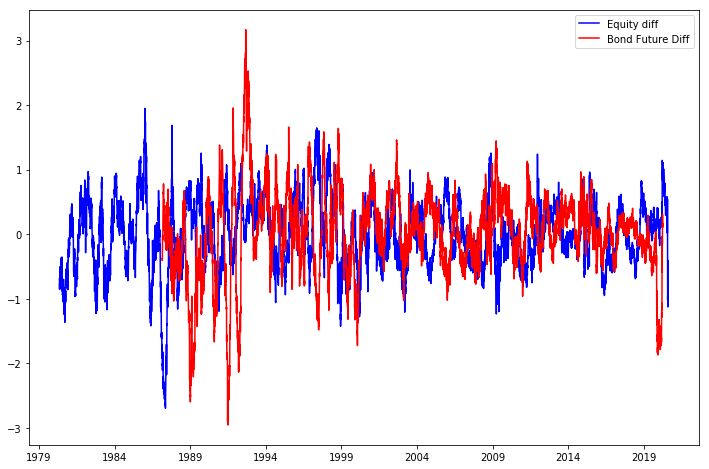

In [153]:
fig = plt.figure(figsize=(12,8))
plt.plot(shifted_signals_diff[country]['EquityPrices'].to_timestamp(), label = 'Equity diff', color='blue')
plt.plot(shifted_signals_diff[country]['BondRetIdx/LocalFX'].to_timestamp(), label = 'Bond Future Diff', color='red')
plt.legend()
plt.show()